# Visualising Data with Python

In [1]:
# Set up environment...
import warnings
warnings.filterwarnings('ignore')

# Properties

## *  Easy to use

## * Flexible

## * Publication quality

## * Interactive

# Matplotlib

### Tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html

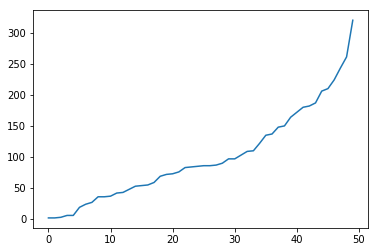

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
def tick(people):
    tickets = np.random.randint(0, people.size, people.size)
    givers = people != 0
    people[givers] -= 1
    np.add.at(people, tickets[np.where(givers)], 1)
    return people
 

# Start off with 50 people and give them each $100
number_people = 50
people = np.ones(number_people, dtype='int') * 100
    
for i in range(10000):
    people = tick(people)

# Plotting code starts here...
plt.plot(sorted(people))

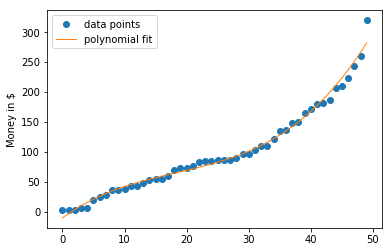

In [3]:
x = list(range(0,number_people))
y = sorted(people)
poly_deg = 3
coefs = np.polyfit(x, y, poly_deg)
y_poly = np.polyval(coefs, x)

plt.plot(x, y, "o", label="data points")
plt.plot(x, y_poly, label="polynomial fit", linewidth=1)
plt.ylabel('Money in $')
plt.legend()
plt.savefig('simulation.svg') 

In [5]:
!open simulation.html

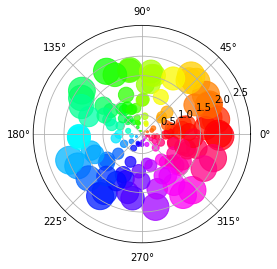

In [6]:
"""
==========================
Scatter plot on polar axis
==========================

Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
plt.show()

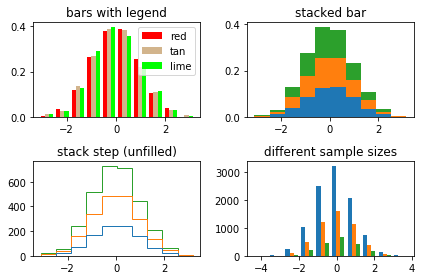

<Figure size 432x288 with 0 Axes>

In [7]:
"""
=============================================================
Demo of the histogram (hist) function with multiple data sets
=============================================================

Plot histogram with multiple sample sets and demonstrate:

    * Use of legend with multiple sample sets
    * Stacked bars
    * Step curve with no fill
    * Data sets of different sample sizes

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()
plt.savefig("histogram.pdf")

In [8]:
!open histogram.pdf

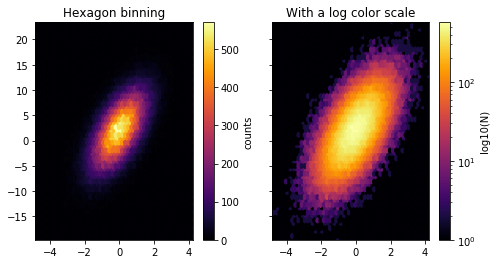

In [9]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [ ]:
import webbrowser

webbrowser.open("https://xkcd.com/418/")

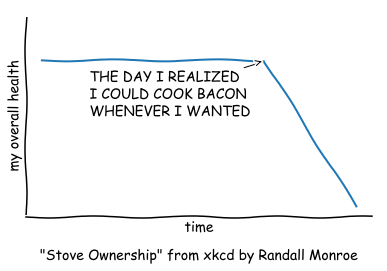

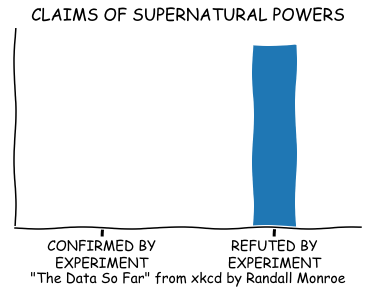

In [10]:
"""
====
XKCD
====

Shows how to create an xkcd-like plot.
"""
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.01,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()

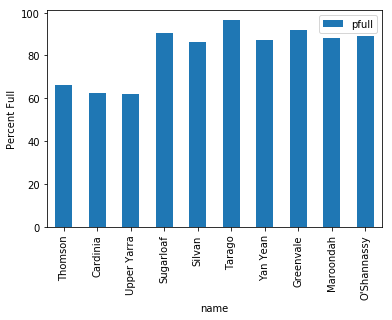

In [11]:
import pandas as pd

%matplotlib inline 

df = pd.read_csv('daily_storage.csv', 
                 names=['name', 'tvol', 'cvol', 'change', 'pfull', 'rain'], 
                 header=0, engine='python', skipfooter=1)


ax = df.plot('name', 'pfull', kind='bar')
_ = ax.set_ylabel("Percent Full")


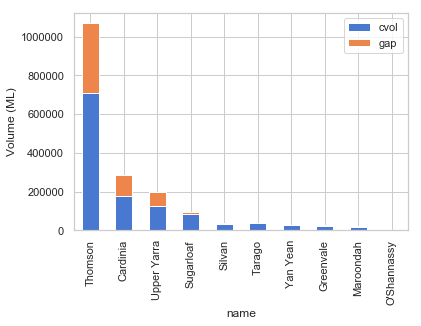

In [12]:
import seaborn as sns
sns.set()
sns.set(style="whitegrid", palette="muted")

df['gap'] = df['tvol'] - df['cvol']
ax = df.plot('name', ['cvol', 'gap'], kind='bar', stacked=True)
_ = ax.set_ylabel("Volume (ML)")

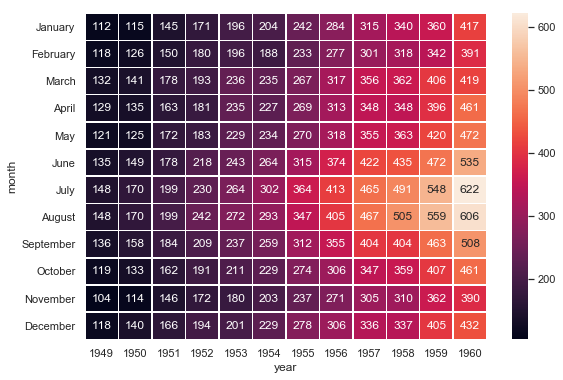

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
p = sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

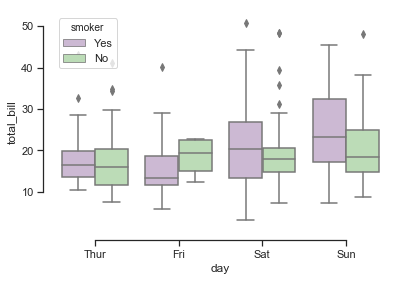

In [14]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips[:10]


sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

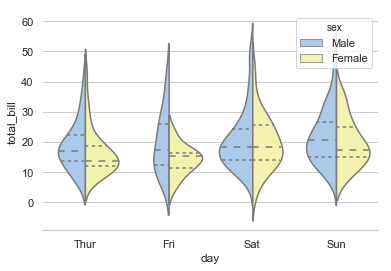

In [15]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

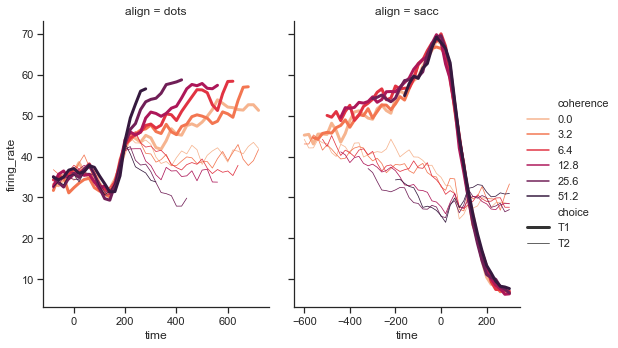

In [16]:
import seaborn as sns
%matplotlib inline

sns.set(style="ticks")

dots = sns.load_dataset("dots")

# Define a palette to ensure that colors will be
# shared across the facets
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

/Users/martin/anaconda3/envs/vismatters/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/martin/anaconda3/envs/vismatters/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/martin/anaconda3/envs/vismatters/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


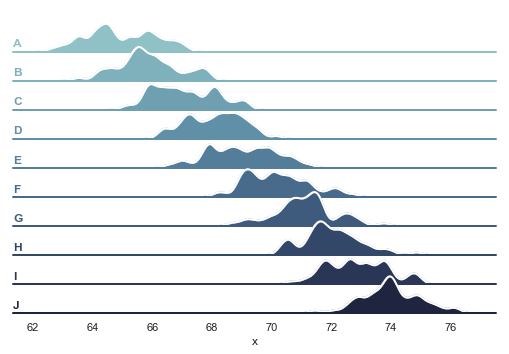

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Maps


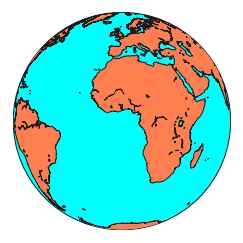

In [19]:
# Show a simple map

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0, resolution='l')

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')

#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

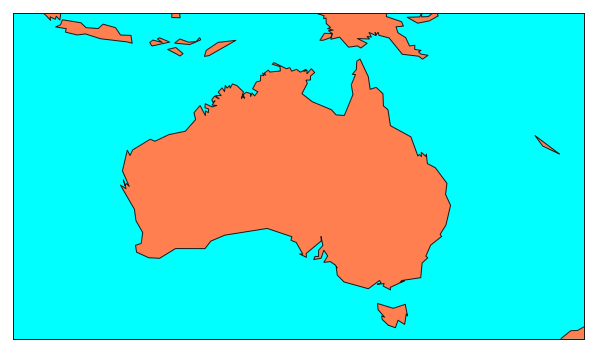

In [20]:
# Show a simple map of Australia

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12,6))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='c')
# map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
plt.show()

In [21]:
import pandas as pd

df = pd.read_csv('stations.csv')
df[:5]

stn_num        stn_name    lat     lon  altitude  date_opened
0     1019       Kalumburu -14.30  126.65        23         1941
1     2012     Halls Creek -18.23  127.66       422         1910
2     3003  Broome Airport -17.95  122.24         7         1910
3     4032    Port Hedland -20.37  118.63         6         1912
4     4106      Marble Bar -21.18  119.75       182         1910

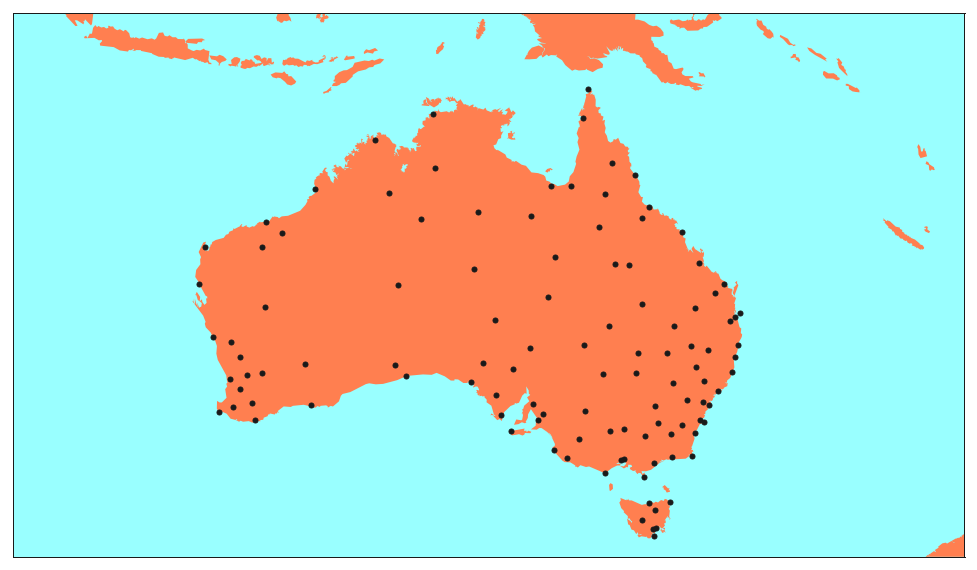

In [22]:
# Show a map of Australia with ACORN-SAT stations

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('stations.csv')

plt.figure(figsize=(20,10))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='#99ffff')
map.fillcontinents(color='coral',lake_color='#99ffff')
map.scatter(df['lon'], df['lat'], 25, marker='o',color='k', zorder=50)

plt.show()

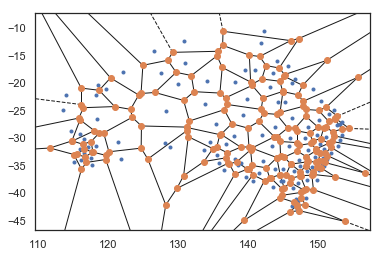

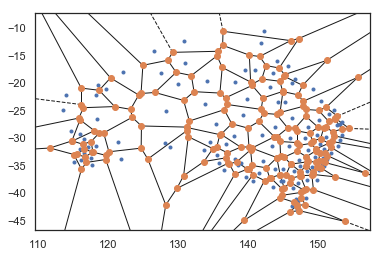

In [23]:
from scipy.spatial import Voronoi, voronoi_plot_2d

lonlat = list(zip(df['lon'], df['lat']))
vor = Voronoi(lonlat)
voronoi_plot_2d(vor)

# See: http://schweitzer.id.au/acorn_sat/voronoi2.html

# Plotly

## Modern Visualization for the Data Era

### * Built on D3.js



In [24]:
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.offline.init_notebook_mode(connected=False)

x = np.random.randn(1000)
y = np.random.randn(1000)

# Plotting starts here...
h = go.FigureWidget(
    data=[
        {'x': x, 'y': y, 'type':'histogram2dcontour'}
    ])
plot(h)

'temp-plot.html'

In [25]:
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=False)

n = 400 * 400
x = np.random.randn(n)
y = np.random.randn(n)
h = go.FigureWidget(data=[go.Scattergl(x=x, y=y, mode='markers', opacity=0.1)])
plot(h)

'temp-plot.html'

# Testing

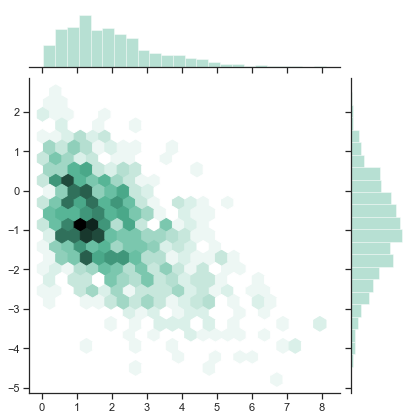

In [26]:
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

# Vega


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


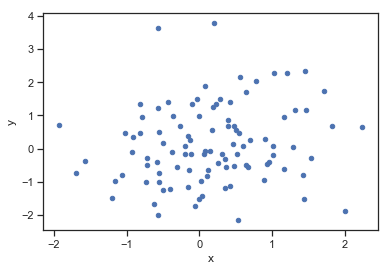

In [27]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
df.plot.scatter(x='x', y='y')

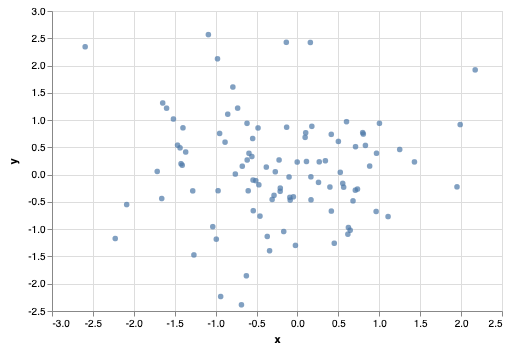

In [28]:
import numpy as np
import pandas as pd
import pdvega  # import adds vgplot attribute to pandas

df = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})

df.vgplot.scatter(x='x', y='y')

# Bokeh

In [29]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()
from numpy import cos, linspace
x = linspace(-6, 6, 100)
y = cos(x)
p = figure(width=500, height=500)
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

Loading BokehJS ...

In [5]:
from bokeh.sampledata.autompg import autompg

grouped = autompg.groupby("yr")

mpg = grouped.mpg
avg, std = mpg.mean(), mpg.std()
years = list(grouped.groups)
american = autompg[autompg["origin"]==1]
japanese = autompg[autompg["origin"]==3]

In [6]:
p = figure(title="MPG by Year (Japan and US)")

p.vbar(x=years, bottom=avg-std, top=avg+std, width=0.8, 
       fill_alpha=0.2, line_color=None, legend="MPG 1 stddev")

p.circle(x=japanese["yr"], y=japanese["mpg"], size=10, alpha=0.5,
         color="red", legend="Japanese")

p.triangle(x=american["yr"], y=american["mpg"], size=10, alpha=0.3,
           color="blue", legend="American")

p.legend.location = "top_left"
show(p)

In [7]:
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

source = ColumnDataSource(autompg)

options = dict(plot_width=300, plot_height=300,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p1 = figure(title="MPG by Year", **options)
p1.circle("yr", "mpg", color="blue", source=source)

p2 = figure(title="HP vs. Displacement", **options)
p2.circle("hp", "displ", color="green", source=source)

p3 = figure(title="MPG vs. Displacement", **options)
p3.circle("mpg", "displ", size="cyl", line_color="red", fill_color=None, source=source)

p = gridplot([[ p1, p2, p3]], toolbar_location="right")

show(p)

In [ ]:
import numpy as np

from bokeh.io import output_file, show
from bokeh.models import HoverTool
from bokeh.plotting import figure

n = 500
x = 2 + 2*np.random.standard_normal(n)
y = 2 + 2*np.random.standard_normal(n)

p = figure(title="Hexbin for 500 points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8)

p.circle(x, y, color="white", size=1)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r]
))

output_file("hexbin.html")

show(p)

# Animatplot

`pip install animatplot`

In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

In [ ]:
x = np.linspace(0, 1, 50)
t = np.linspace(0, 1, 20)

X, T = np.meshgrid(x, t)
Y = np.sin(2*np.pi*(X+T))

In [ ]:
%matplotlib notebook
%matplotlib notebook

block = amp.blocks.Line(X, Y)
anim = amp.Animation([block])

# anim.save_gif('line1') # save animation for docs
plt.show()

In [ ]:
%matplotlib notebook
%matplotlib notebook

block = amp.blocks.Line(X, Y)
anim = amp.Animation([block])

anim.controls() # creates a timeline_slider and a play/pause toggle
# anim.save_gif('line2') # save animation for docs
plt.show()

In [ ]:
%matplotlib notebook
%matplotlib notebook

block = amp.blocks.Line(X, Y)
anim = amp.Animation([block], t) # pass in the time values

anim.controls()
# anim.save_gif('line3') # save animation for docs
plt.show()

In [ ]:
%matplotlib notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp


In [ ]:
x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
t = np.linspace(0, 2*np.pi, 30)

X, Y, T = np.meshgrid(x, y, t)

pcolormesh_data = np.sin(X*X+Y*Y-T)
line_data = pcolormesh_data[20,:,:] # the slice where y=0

In [ ]:
# standard matplotlib stuff
# create the different plotting axes
fig, (ax1, ax2) = plt.subplots(1, 2)

for ax in [ax1, ax2]:
    ax.set_aspect('equal')
    ax.set_xlabel('x')

ax2.set_ylabel('y', labelpad=-5)
ax1.set_ylabel('z')
ax1.set_ylim([-1.1,1.1])

fig.suptitle('Multiple blocks')
ax1.set_title('Cross Section: $y=0$')
ax2.set_title(r'$z=\sin(x^2+y^2-t)$')

# animatplot stuff
# now we make our blocks
line_block       = amp.blocks.Line(X[0,:,:], line_data,
                                   axis=ax1, t_axis=1)
pcolormesh_block = amp.blocks.Pcolormesh(X[:,:,0], Y[:,:,0], pcolormesh_data,
                                         axis=ax2, t_axis=2, vmin=-1, vmax=1)
plt.colorbar(pcolormesh_block.quad)
timeline = amp.Timeline(t, fps=10)

# now to contruct the animation
anim = amp.Animation([pcolormesh_block, line_block], timeline)
anim.controls()

# anim.save_gif('images/multiblock')
plt.show()

# Summary

## Matplotlib

* Lowest common denominator

* Flexible

* Simple for simple plots

* Looks okay

## Seaborn

* Improves the look of Matplotlib

* Improves styling

* Has some nice precooked styles

## Pandas

* As for Matplotlib

## Basemap

* Lowest common denominator for plotting on maps

* Consider Cartopy

## Plotly

* Good for interactive web plots

* Mixed model (commercial/open source)

## Vega

* Nice graphics

* Includes data with graphs

